<a href="https://colab.research.google.com/github/Nela-B/Project/blob/main/ReportBISInternational.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 31.9 MB/s 
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=af3cd2a541b4243f133c5093365b47ee1189d8687e4339ad022f6c951bde23fe
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23594 sha256=69a84e5951fd811e32344476056648b7ed2828940dd170638d13161712df932c
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built pyvis stringdist


In [ ]:
import pm4py
import pandas as pd
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.objects.log.importer.xes import importer as xes_importer

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Importing data
LogInternationalD = pm4py.read_xes('InternationalDeclarations.xes')

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

In [ ]:
#from pm4py.objects.log.importer.xes import importer as xes_importer
#import gzip
#logID = xes_importer.apply('InternationalDeclarations.xes')

In [ ]:
## Converting event log into a dataframe
LogInternationalD = pm4py.convert_to_dataframe(LogInternationalD)

In [ ]:
LogInternationalD 

,id,org:resource,concept:name,time:timestamp,org:role,case:Permit travel permit number,case:DeclarationNumber,case:Amount,case:RequestedAmount,case:Permit TaskNumber,...,case:concept:name,case:Permit OrganizationalEntity,case:travel permit number,case:Permit RequestedBudget,case:id,case:Permit ID,case:Permit id,case:BudgetNumber,case:Permit ActivityNumber,case:AdjustedAmount
0,rv_travel permit 76455_6,STAFF MEMBER,Start trip,2016-10-05 00:00:00+02:00,EMPLOYEE,travel permit number 76456,declaration number 76458,39.664561,39.664561,UNKNOWN,...,declaration 76457,organizational unit 65458,travel permit number 76456,41.613445,declaration 76457,travel permit 76455,travel permit 76455,budget 144133,activity 46005,39.664561
1,rv_travel permit 76455_7,STAFF MEMBER,End trip,2016-10-05 00:00:00+02:00,EMPLOYEE,travel permit number 76456,declaration number 76458,39.664561,39.664561,UNKNOWN,...,declaration 76457,organizational unit 65458,travel permit number 76456,41.613445,declaration 76457,travel permit 76455,travel permit 76455,budget 144133,activity 46005,39.664561
2,st_step 76459_0,STAFF MEMBER,Permit SUBMITTED by EMPLOYEE,2017-04-06 13:32:10+02:00,EMPLOYEE,travel permit number 76456,declaration number 76458,39.664561,39.664561,UNKNOWN,...,declaration 76457,organizational unit 65458,travel permit number 76456,41.613445,declaration 76457,travel permit 76455,travel permit 76455,budget 144133,activity 46005,39.664561
3,st_step 76460_0,STAFF MEMBER,Permit FINAL_APPROVED by SUPERVISOR,2017-04-06 13:32:28+02:00,SUPERVISOR,travel permit number 76456,declaration number 76458,39.664561,39.664561,UNKNOWN,...,declaration 76457,organizational unit 65458,travel permit number 76456,41.613445,declaration 76457,travel permit 76455,travel permit 76455,budget 144133,activity 46005,39.664561
4,st_step 76461_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-04-07 13:38:14+02:00,EMPLOYEE,travel permit number 76456,declaration number 76458,39.664561,39.664561,UNKNOWN,...,declaration 76457,organizational unit 65458,travel permit number 76456,41.613445,declaration 76457,travel permit 76455,travel permit 76455,budget 144133,activity 46005,39.664561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72146,st_step 13239_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-12-18 15:06:50+01:00,EMPLOYEE,travel permit number 13227,UNKNOWN,0.000000,0.000000,task 427,...,declaration 13232,organizational unit 65455,travel permit number 13227,1727.559756,declaration 13232,travel permit 13226,travel permit 13226,budget 147449,UNKNOWN,0.000000
72147,st_step 13241_0,STAFF MEMBER,Declaration REJECTED by ADMINISTRATION,2018-12-18 15:06:57+01:00,ADMINISTRATION,travel permit number 13227,UNKNOWN,0.000000,0.000000,task 427,...,declaration 13232,organizational unit 65455,travel permit number 13227,1727.559756,declaration 13232,travel permit 13226,travel permit 13226,budget 147449,UNKNOWN,0.000000
72148,st_step 13240_0,STAFF MEMBER,Declaration REJECTED by EMPLOYEE,2018-12-19 14:05:36+01:00,EMPLOYEE,travel permit number 13227,UNKNOWN,0.000000,0.000000,task 427,...,declaration 13232,organizational unit 65455,travel permit number 13227,1727.559756,declaration 13232,travel permit 13226,travel permit 13226,budget 147449,UNKNOWN,0.000000
72149,rv_travel permit 13226_6,STAFF MEMBER,Start trip,2019-02-19 00:00:00+01:00,EMPLOYEE,travel permit number 13227,UNKNOWN,0.000000,0.000000,task 427,...,declaration 13232,organizational unit 65455,travel permit number 13227,1727.559756,declaration 13232,travel permit 13226,travel permit 13226,budget 147449,UNKNOWN,0.000000


In [ ]:
LogInternationalD.columns

Index(['id', 'org:resource', 'concept:name', 'time:timestamp', 'org:role',
       'case:Permit travel permit number', 'case:DeclarationNumber',
       'case:Amount', 'case:RequestedAmount', 'case:Permit TaskNumber',
       'case:Permit BudgetNumber', 'case:OriginalAmount',
       'case:Permit ProjectNumber', 'case:concept:name',
       'case:Permit OrganizationalEntity', 'case:travel permit number',
       'case:Permit RequestedBudget', 'case:id', 'case:Permit ID',
       'case:Permit id', 'case:BudgetNumber', 'case:Permit ActivityNumber',
       'case:AdjustedAmount'],
      dtype='object')

In [ ]:
## Question 5

In [ ]:
info = LogInternationalD.groupby('case:concept:name').agg(
numActivities = ('concept:name', 'count'),\
projectNumber = ('case:Permit ProjectNumber', lambda x: ' '.join(x) ),\
activities = ('concept:name', lambda x: ' '.join(x) ),\
)

In [ ]:
declarationSubmitted = info[info['activities'].str.contains('Declaration SUBMITTED by EMPLOYEE')]
declarationSubmitted

,numActivities,projectNumber,activities
case:concept:name,,,
declaration 1002,10,UNKNOWN UNKNOWN UNKNOWN UNKNOWN UNKNOWN UNKNOW...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 10024,12,UNKNOWN UNKNOWN UNKNOWN UNKNOWN UNKNOWN UNKNOW...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 10026,12,UNKNOWN UNKNOWN UNKNOWN UNKNOWN UNKNOWN UNKNOW...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 10046,10,project 10042 project 10042 project 10042 proj...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 10069,10,project 10068 project 10068 project 10068 proj...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
...,...,...,...
declaration 9934,10,UNKNOWN UNKNOWN UNKNOWN UNKNOWN UNKNOWN UNKNOW...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 9945,10,project 9944 project 9944 project 9944 project...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 9955,12,UNKNOWN UNKNOWN UNKNOWN UNKNOWN UNKNOWN UNKNOW...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...


In [ ]:
unknownProject = declarationSubmitted[declarationSubmitted['projectNumber'].str.contains('UNKNOWN')]
len(unknownProject)

2300

In [ ]:
knownProject = declarationSubmitted[declarationSubmitted['projectNumber'].str.contains('UNKNOWN') == False ]
knownProject

,numActivities,projectNumber,activities
case:concept:name,,,
declaration 10046,10,project 10042 project 10042 project 10042 proj...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 10069,10,project 10068 project 10068 project 10068 proj...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 10089,13,project 4850 project 4850 project 4850 project...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 10106,13,project 10102 project 10102 project 10102 proj...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 10128,10,project 10127 project 10127 project 10127 proj...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
...,...,...,...
declaration 9868,11,project 9867 project 9867 project 9867 project...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 9918,15,project 2977 project 2977 project 2977 project...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 9945,10,project 9944 project 9944 project 9944 project...,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...


In [ ]:
len(knownProject)

4075

In [ ]:
knownProject['projectNumber'] = knownProject['projectNumber'].str[:13]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
knownProject

,numActivities,projectNumber,activities
case:concept:name,,,
declaration 10046,10,project 10042,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 10069,10,project 10068,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 10089,13,project 4850 p,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 10106,13,project 10102,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 10128,10,project 10127,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
...,...,...,...
declaration 9868,11,project 9867 p,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 9918,15,project 2977 p,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...
declaration 9945,10,project 9944 p,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...


In [ ]:
frequencyProject = knownProject.groupby(knownProject.projectNumber.tolist(),as_index=False).size().sort_values('size',  ascending=False).reset_index()
frequencyProject

,level_0,index,size
0,464,project 426 pr,454
1,403,project 3442 p,52
2,795,project 8761 p,47
3,636,project 647 pr,38
4,623,project 636 pr,36
...,...,...,...
817,617,project 62148,1
818,382,project 32969,1
819,615,project 61659,1
820,383,project 33023,1


In [ ]:
len(knownProject[knownProject['projectNumber'].str.contains('project 426')])

454

In [ ]:
len(knownProject[knownProject['projectNumber'].str.contains('project 3442')])

52

In [ ]:
len(knownProject[knownProject['projectNumber'].str.contains('project 8761')])

47

In [ ]:
#INTERNATIONAL DECLARATIONS ANALYSIS

In [ ]:
LogInternationalD = LogInternationalD.sort_values('time:timestamp')

In [ ]:
LogInternationalD

,id,org:resource,concept:name,time:timestamp,org:role,case:Permit travel permit number,case:DeclarationNumber,case:Amount,case:RequestedAmount,case:Permit TaskNumber,...,case:concept:name,case:Permit OrganizationalEntity,case:travel permit number,case:Permit RequestedBudget,case:id,case:Permit ID,case:Permit id,case:BudgetNumber,case:Permit ActivityNumber,case:AdjustedAmount
0,rv_travel permit 76455_6,STAFF MEMBER,Start trip,2016-10-05 00:00:00+02:00,EMPLOYEE,travel permit number 76456,declaration number 76458,39.664561,39.664561,UNKNOWN,...,declaration 76457,organizational unit 65458,travel permit number 76456,41.613445,declaration 76457,travel permit 76455,travel permit 76455,budget 144133,activity 46005,39.664561
1,rv_travel permit 76455_7,STAFF MEMBER,End trip,2016-10-05 00:00:00+02:00,EMPLOYEE,travel permit number 76456,declaration number 76458,39.664561,39.664561,UNKNOWN,...,declaration 76457,organizational unit 65458,travel permit number 76456,41.613445,declaration 76457,travel permit 76455,travel permit 76455,budget 144133,activity 46005,39.664561
8,rv_travel permit 76665_6,STAFF MEMBER,Start trip,2016-11-21 00:00:00+01:00,EMPLOYEE,travel permit number 76666,declaration number 76668,346.544903,346.544903,task 427,...,declaration 76667,organizational unit 65458,travel permit number 76666,795.537307,declaration 76667,travel permit 76665,travel permit 76665,budget 144054,UNKNOWN,346.544903
17,rv_travel permit 73652_7,STAFF MEMBER,End trip,2016-12-08 00:00:00+01:00,EMPLOYEE,travel permit number 73653,declaration number 73655,56.972769,56.972769,UNKNOWN,...,declaration 73654,organizational unit 65455,travel permit number 73653,51.793426,declaration 73654,travel permit 73652,travel permit 73652,budget 143677,UNKNOWN,56.972769
16,rv_travel permit 73652_6,STAFF MEMBER,Start trip,2016-12-08 00:00:00+01:00,EMPLOYEE,travel permit number 73653,declaration number 73655,56.972769,56.972769,UNKNOWN,...,declaration 73654,organizational unit 65455,travel permit number 73653,51.793426,declaration 73654,travel permit 73652,travel permit 73652,budget 143677,UNKNOWN,56.972769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64840,rv_travel permit 29888_7,STAFF MEMBER,End trip,2019-09-27 00:00:00+02:00,EMPLOYEE,travel permit number 29889,declaration number 29891,162.567308,162.567308,UNKNOWN,...,declaration 29890,organizational unit 65456,travel permit number 29889,86.880180,declaration 29890,travel permit 29888,travel permit 29888,budget 147503,UNKNOWN,162.567308
54120,rv_travel permit 63064_7,STAFF MEMBER,End trip,2019-10-01 00:00:00+02:00,EMPLOYEE,travel permit number 63065,declaration number 63067,138.965857,138.965857,task 427,...,declaration 63066,organizational unit 65456,travel permit number 63065,138.720181,declaration 63066,travel permit 63064,travel permit 63064,budget 146820,UNKNOWN,138.965857
67218,rv_travel permit 58174_7,STAFF MEMBER,End trip,2019-10-11 00:00:00+02:00,EMPLOYEE,travel permit number 58175,declaration number 58177,70.199519,70.199519,task 427,...,declaration 58176,organizational unit 65456,travel permit number 58175,39.853293,declaration 58176,travel permit 58174,travel permit 58174,budget 147512,UNKNOWN,70.199519
67217,rv_travel permit 58174_6,STAFF MEMBER,Start trip,2019-10-11 00:00:00+02:00,EMPLOYEE,travel permit number 58175,declaration number 58177,70.199519,70.199519,task 427,...,declaration 58176,organizational unit 65456,travel permit number 58175,39.853293,declaration 58176,travel permit 58174,travel permit 58174,budget 147512,UNKNOWN,70.199519


In [ ]:
LogInternationalD.columns

Index(['id', 'org:resource', 'concept:name', 'time:timestamp', 'org:role',
       'case:Permit travel permit number', 'case:DeclarationNumber',
       'case:Amount', 'case:RequestedAmount', 'case:Permit TaskNumber',
       'case:Permit BudgetNumber', 'case:OriginalAmount',
       'case:Permit ProjectNumber', 'case:concept:name',
       'case:Permit OrganizationalEntity', 'case:travel permit number',
       'case:Permit RequestedBudget', 'case:id', 'case:Permit ID',
       'case:Permit id', 'case:BudgetNumber', 'case:Permit ActivityNumber',
       'case:AdjustedAmount'],
      dtype='object')

In [ ]:
timeCount = LogInternationalD[(LogInternationalD['concept:name']== 'Declaration SUBMITTED by EMPLOYEE') | (LogInternationalD['concept:name'] == 'Payment Handled')]

In [ ]:
info = timeCount.groupby('case:concept:name').agg(
duration = ('time:timestamp', lambda x: x.max()- x.min()),\
)

In [ ]:
info['duration'].mean()

Timedelta('14 days 04:39:13.382117647')

In [ ]:
info['duration'].median()

Timedelta('10 days 03:39:43')

In [ ]:
## Filtering

In [ ]:
filtered = pm4py.filter_time_range(LogInternationalD, "2018-01-01 00:00:00", "2099-01-01 00:00:00", mode='traces_contained')
len(filtered)

57265

In [ ]:
## Finding the start activities
log_start = pm4py.get_start_activities(filtered)
log_start

{'Declaration SAVED by EMPLOYEE': 3,
 'Declaration SUBMITTED by EMPLOYEE': 230,
 'End trip': 44,
 'Permit SUBMITTED by EMPLOYEE': 4148,
 'Start trip': 472}

In [ ]:
## Finding the end activities
end_activities = pm4py.get_end_activities(filtered)
end_activities

{'Declaration REJECTED by EMPLOYEE': 116,
 'Declaration REJECTED by SUPERVISOR': 1,
 'Declaration SAVED by EMPLOYEE': 45,
 'End trip': 333,
 'Payment Handled': 4396,
 'Request Payment': 3,
 'Send Reminder': 2,
 'Start trip': 1}

In [ ]:
activities = pm4py.get_event_attribute_values(filtered, "concept:name")
activities

{'Declaration APPROVED by ADMINISTRATION': 4817,
 'Declaration APPROVED by BUDGET OWNER': 1773,
 'Declaration APPROVED by SUPERVISOR': 145,
 'Declaration FINAL_APPROVED by DIRECTOR': 144,
 'Declaration FINAL_APPROVED by SUPERVISOR': 4543,
 'Declaration REJECTED by ADMINISTRATION': 1512,
 'Declaration REJECTED by BUDGET OWNER': 36,
 'Declaration REJECTED by DIRECTOR': 1,
 'Declaration REJECTED by EMPLOYEE': 1621,
 'Declaration REJECTED by SUPERVISOR': 93,
 'Declaration SAVED by EMPLOYEE': 58,
 'Declaration SUBMITTED by EMPLOYEE': 6334,
 'End trip': 4897,
 'Payment Handled': 4687,
 'Permit APPROVED by ADMINISTRATION': 4722,
 'Permit APPROVED by BUDGET OWNER': 1715,
 'Permit APPROVED by SUPERVISOR': 420,
 'Permit FINAL_APPROVED by DIRECTOR': 419,
 'Permit FINAL_APPROVED by SUPERVISOR': 4212,
 'Permit REJECTED by ADMINISTRATION': 79,
 'Permit REJECTED by BUDGET OWNER': 27,
 'Permit REJECTED by DIRECTOR': 1,
 'Permit REJECTED by EMPLOYEE': 169,
 'Permit REJECTED by MISSING': 1,
 'Permit REJ

In [ ]:
# Getting cases that were sucessfully handled
filtered = pm4py.filter_event_attribute_values(filtered, 'concept:name', ['Payment Handled'])
len(filtered)

55541

In [ ]:
activities = pm4py.get_event_attribute_values(filtered, "concept:name")
activities

{'Declaration APPROVED by ADMINISTRATION': 4798,
 'Declaration APPROVED by BUDGET OWNER': 1769,
 'Declaration APPROVED by SUPERVISOR': 145,
 'Declaration FINAL_APPROVED by DIRECTOR': 144,
 'Declaration FINAL_APPROVED by SUPERVISOR': 4543,
 'Declaration REJECTED by ADMINISTRATION': 1356,
 'Declaration REJECTED by BUDGET OWNER': 31,
 'Declaration REJECTED by DIRECTOR': 1,
 'Declaration REJECTED by EMPLOYEE': 1455,
 'Declaration REJECTED by SUPERVISOR': 79,
 'Declaration SUBMITTED by EMPLOYEE': 6159,
 'End trip': 4687,
 'Payment Handled': 4687,
 'Permit APPROVED by ADMINISTRATION': 4527,
 'Permit APPROVED by BUDGET OWNER': 1643,
 'Permit APPROVED by SUPERVISOR': 402,
 'Permit FINAL_APPROVED by DIRECTOR': 401,
 'Permit FINAL_APPROVED by SUPERVISOR': 4036,
 'Permit REJECTED by ADMINISTRATION': 77,
 'Permit REJECTED by BUDGET OWNER': 27,
 'Permit REJECTED by DIRECTOR': 1,
 'Permit REJECTED by EMPLOYEE': 166,
 'Permit REJECTED by MISSING': 1,
 'Permit REJECTED by SUPERVISOR': 62,
 'Permit SUB

In [ ]:
filtered = pm4py.filter_event_attribute_values(filtered, 'concept:name', ['Permit REJECTED by MISSING', 'Permit REJECTED by BUDGET OWNER', 'Permit REJECTED by DIRECTOR',  'Permit REJECTED by ADMINISTRATION', 'Permit REJECTED by EMPLOYEE', 'Permit REJECTED by SUPERVISOR' ], retain = False)

In [ ]:
len(filtered)

52952

In [ ]:
filtered = pm4py.filter_event_attribute_values(filtered, 'concept:name', ['Declaration REJECTED by ADMINISTRATION', 'Declaration REJECTED by BUDGET OWNER', 'Declaration REJECTED by DIRECTOR', 'Declaration REJECTED by EMPLOYEE', 'Declaration REJECTED by SUPERVISOR' ], retain = False)

In [ ]:
filtered = pm4py.filter_event_attribute_values(filtered, 'concept:name', ['Declaration FINAL_APPROVED by SUPERVISOR'])

In [ ]:
filtered = pm4py.filter_event_attribute_values(filtered, 'concept:name', ['Permit APPROVED by ADMINISTRATION'])


In [ ]:
filtered = pm4py.filter_event_attribute_values(filtered, 'concept:name', [ 'Declaration SUBMITTED by EMPLOYEE'])

In [ ]:
len(filtered)

33912

In [ ]:
activities = pm4py.get_event_attribute_values(filtered , "concept:name")
activities


{'Declaration APPROVED by ADMINISTRATION': 3130,
 'Declaration APPROVED by BUDGET OWNER': 1088,
 'Declaration FINAL_APPROVED by SUPERVISOR': 3130,
 'Declaration SUBMITTED by EMPLOYEE': 3130,
 'End trip': 3130,
 'Payment Handled': 3130,
 'Permit APPROVED by ADMINISTRATION': 3130,
 'Permit APPROVED by BUDGET OWNER': 1075,
 'Permit APPROVED by SUPERVISOR': 197,
 'Permit FINAL_APPROVED by DIRECTOR': 197,
 'Permit FINAL_APPROVED by SUPERVISOR': 2933,
 'Permit SUBMITTED by EMPLOYEE': 3130,
 'Request Payment': 3128,
 'Send Reminder': 254,
 'Start trip': 3130}

In [ ]:
info = filtered.groupby('case:concept:name').agg(
numActivities = ('concept:name', 'count'),\
activities = ('concept:name', lambda x: ' '.join(x) ),\
)


In [ ]:
info.numActivities.sort_values()

case:concept:name
declaration 36423     9
declaration 1002     10
declaration 47522    10
declaration 47556    10
declaration 47612    10
                     ..
declaration 1886     14
declaration 42627    14
declaration 31697    14
declaration 19594    14
declaration 36181    14
Name: numActivities, Length: 3130, dtype: int64

In [ ]:
## Number of variants
info['activities'].nunique()

130

In [ ]:
## Time from submission to payment
timeCount = filtered[(filtered['concept:name']== 'Declaration SUBMITTED by EMPLOYEE') | (filtered['concept:name'] == 'Payment Handled')]

In [ ]:
info = timeCount.groupby('case:concept:name').agg(
duration = ('time:timestamp', lambda x: x.max()- x.min()),\
)

In [ ]:
info['duration'].mean()

Timedelta('12 days 20:16:29.100958466')

In [ ]:
info['duration'].median()

Timedelta('9 days 09:20:09.500000')

In [ ]:
info = filtered.groupby('case:concept:name').agg(
numActivities = ('concept:name', 'count'),\
duration = ('time:timestamp', lambda x: x.max()- x.min()),\
activities = ('concept:name', lambda x: ' '.join(x) ),\
)

In [ ]:
internationalGraph = info.groupby(info.activities.tolist(),as_index=False).size().sort_values('size',  ascending=False).reset_index()
internationalGraph

,level_0,index,size
0,79,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,1335
1,33,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,600
2,111,Start trip End trip Permit SUBMITTED by EMPLOY...,120
3,81,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,91
4,51,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,85
...,...,...,...
125,97,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,1
126,98,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,1
127,63,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,1
128,100,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,1


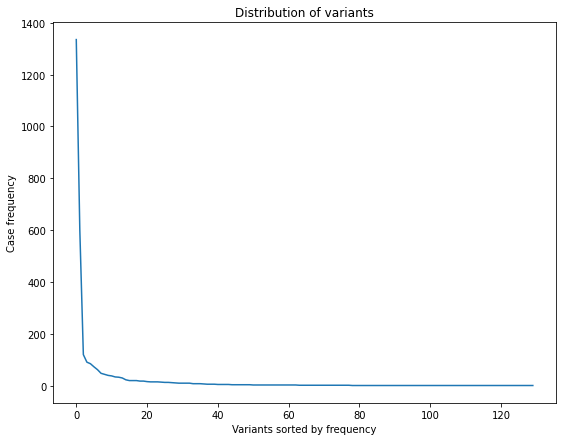

In [ ]:
fig = plt.figure(figsize = (9, 7))
plt.plot(internationalGraph["size"])
plt.xlabel('Variants sorted by frequency')
plt.ylabel('Case frequency')
plt.title("Distribution of variants")
plt.show()

In [ ]:
internationalGraph10 = internationalGraph[internationalGraph["size"] >= 10]
internationalGraph10

,level_0,index,size
0,79,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,1335
1,33,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,600
2,111,Start trip End trip Permit SUBMITTED by EMPLOY...,120
3,81,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,91
4,51,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,85
5,102,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,73
6,12,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,62
7,106,Start trip End trip Permit SUBMITTED by EMPLOY...,48
8,77,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,44
9,36,Permit SUBMITTED by EMPLOYEE Permit APPROVED b...,40


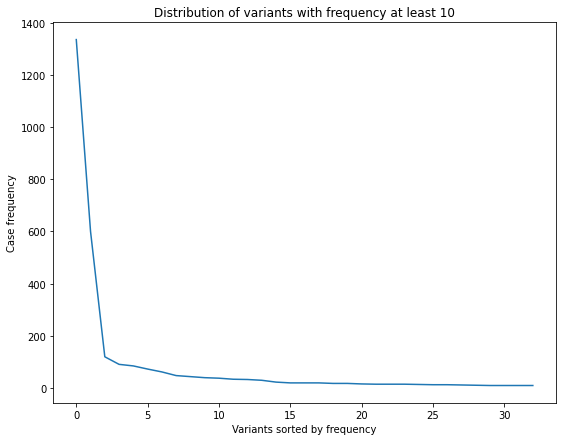

In [ ]:
fig = plt.figure(figsize = (9, 7))
plt.plot(internationalGraph10["size"])
plt.xlabel('Variants sorted by frequency')
plt.ylabel('Case frequency')
plt.title("Distribution of variants with frequency at least 10")
plt.show()

In [ ]:
print(internationalGraph["size"].sum())
print(internationalGraph10["size"].sum())

3130
2916


In [ ]:
# Number of cases in variants (that do not have frequency higher than 10)
internationalGraph["size"].sum()- internationalGraph10["size"].sum()

214

In [ ]:
len(internationalGraph10)

33

In [ ]:
log_filtered = pm4py.convert_to_event_log(filtered)

In [ ]:
# Filtering on top 33 variants according to frequency,
filtered_log = pm4py.filter_variants_top_k(log_filtered, 33)

In [ ]:
len(filtered_log)

2916

In [ ]:
filtered = pm4py.convert_to_dataframe(filtered_log)

In [ ]:
timeCount = filtered[(filtered['concept:name']== 'Declaration SUBMITTED by EMPLOYEE') | (filtered['concept:name'] == 'Payment Handled')]

In [ ]:
info = timeCount.groupby('case:concept:name').agg(
duration = ('time:timestamp', lambda x: x.max()- x.min()),\
activities = ('concept:name', lambda x: ' '.join(x) ),\
)

In [ ]:
info

,duration,activities
case:concept:name,,
declaration 1002,13 days 01:15:56,Declaration SUBMITTED by EMPLOYEE Payment Handled
declaration 10024,6 days 20:23:09,Declaration SUBMITTED by EMPLOYEE Payment Handled
declaration 10026,8 days 00:54:59,Declaration SUBMITTED by EMPLOYEE Payment Handled
declaration 10046,2 days 06:04:40,Declaration SUBMITTED by EMPLOYEE Payment Handled
declaration 10069,6 days 08:26:57,Declaration SUBMITTED by EMPLOYEE Payment Handled
...,...,...
declaration 9894,10 days 05:13:11,Declaration SUBMITTED by EMPLOYEE Payment Handled
declaration 9906,21 days 08:10:33,Declaration SUBMITTED by EMPLOYEE Payment Handled
declaration 9934,9 days 01:13:05,Declaration SUBMITTED by EMPLOYEE Payment Handled


In [ ]:
print(info['duration'].mean(), info['duration'].median())

12 days 06:00:35.798353909 9 days 07:42:19


In [ ]:
budget = filtered[(filtered['concept:name']== 'Declaration SUBMITTED by EMPLOYEE') | (filtered['concept:name'] == 'Payment Handled')  | (filtered['concept:name'] == 'Declaration APPROVED by BUDGET OWNER') ]

In [ ]:
info = budget.groupby('case:concept:name').agg(
duration = ('time:timestamp', lambda x: x.max()- x.min()),\
activities = ('concept:name', lambda x: ' '.join(x) ),\
)

In [ ]:
BudgetOwner = info[info['activities'].str.contains(' APPROVED')]

In [ ]:
BudgetOwner['duration'].mean()

Timedelta('14 days 03:42:46.287211740')

In [ ]:
BudgetOwner['duration'].median()

Timedelta('11 days 23:51:22')

In [ ]:
len(BudgetOwner)

954

In [ ]:
NotBudgetOwner = info[info['activities'].str.contains('Declaration APPROVED by BUDGET OWNER')== False]

In [ ]:
NotBudgetOwner['duration'].mean()

Timedelta('11 days 07:47:14.734964322')

In [ ]:
NotBudgetOwner['duration'].median()

Timedelta('7 days 22:38:50')

In [ ]:
len(NotBudgetOwner)

1962

In [ ]:
case_arrival_ratio = pm4py.get_case_arrival_average(filtered_log)
case_arrival_ratio

10155.366037735848

In [ ]:
rework = pm4py.get_rework_cases_per_activity(filtered_log)
rework

{}

In [ ]:
## Process Discovery

# Algorithms
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.batches import algorithm 

# Visualizations
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# Evaluation
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

from pm4py.objects.conversion.process_tree import converter as pt_converter

In [ ]:
## A directly-followed graph

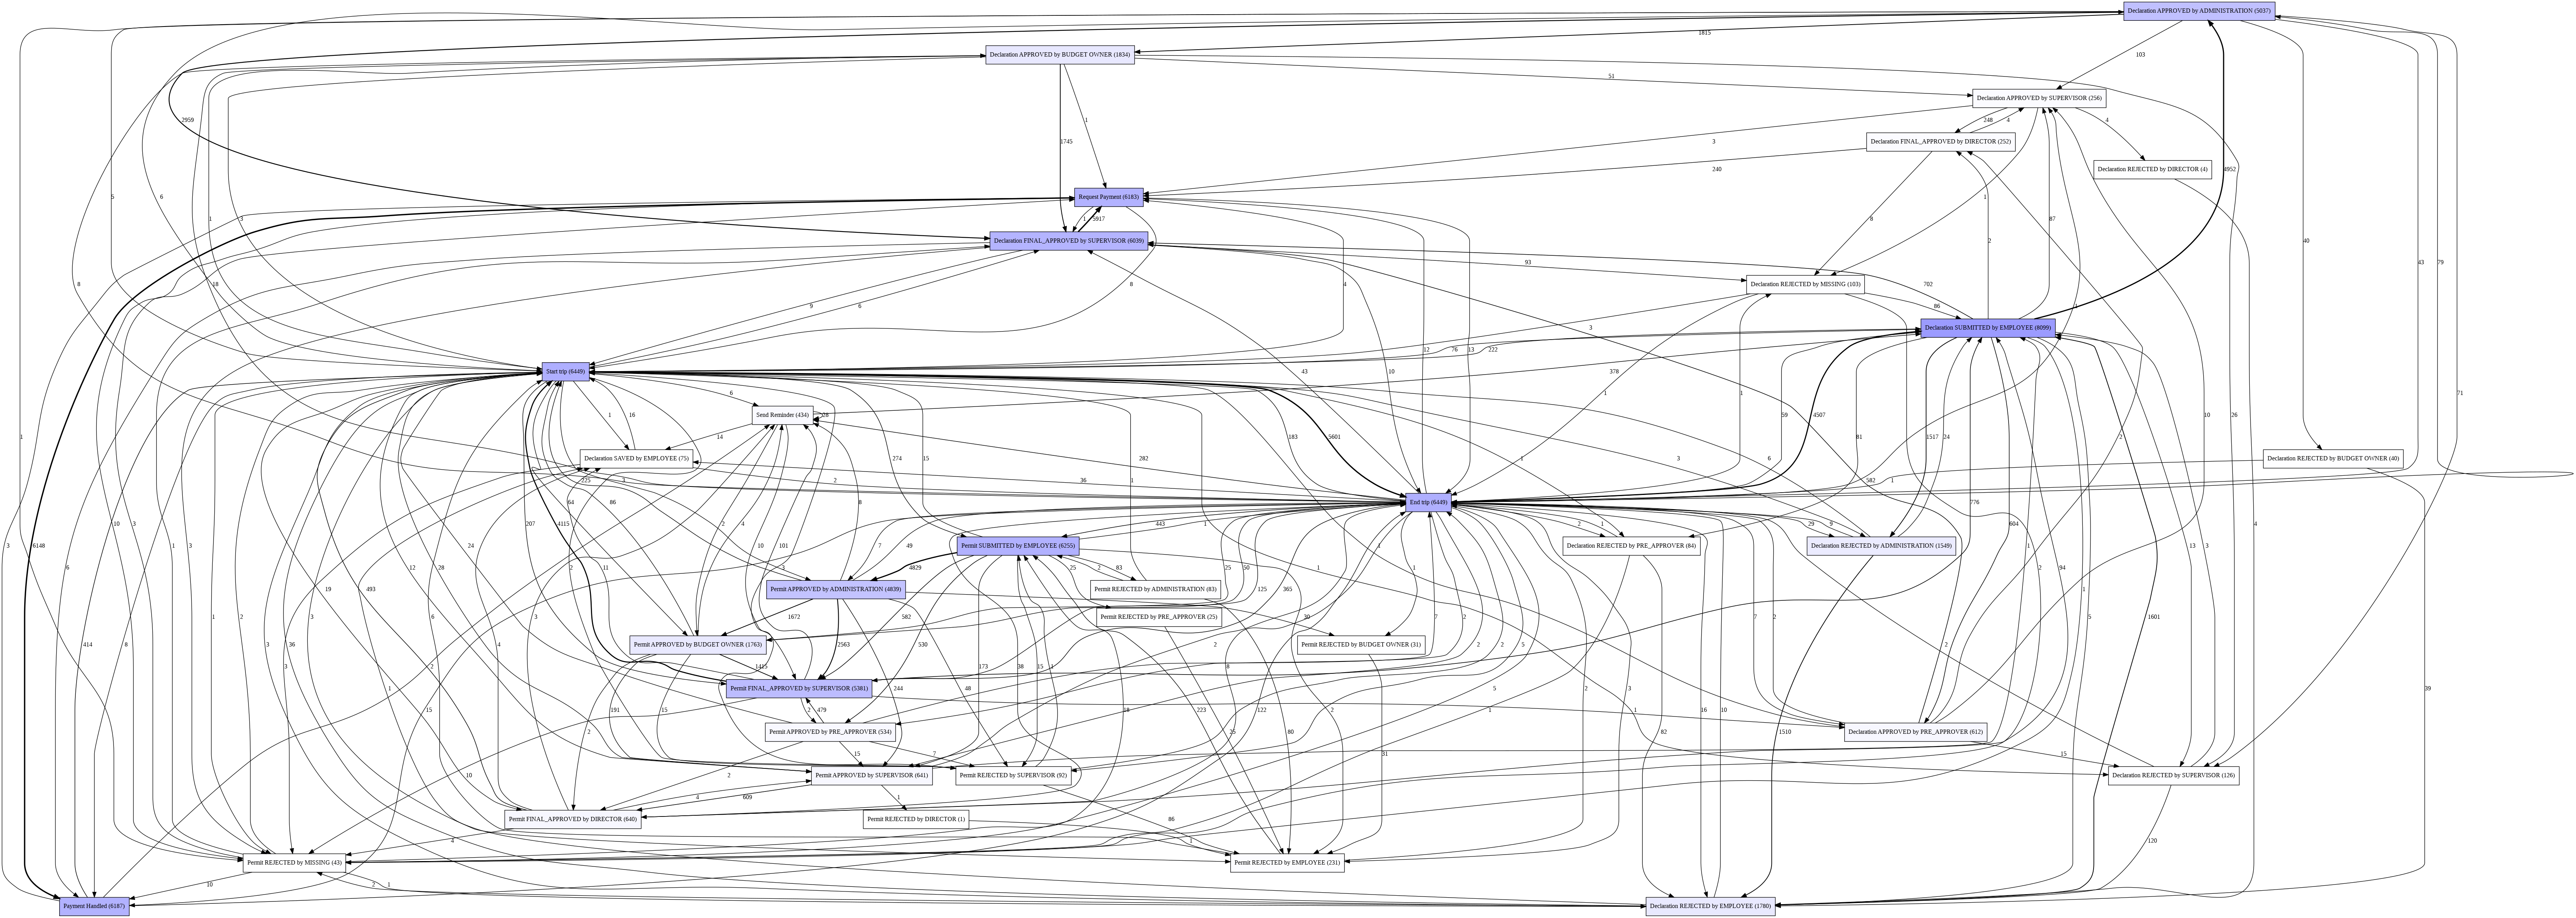

In [ ]:
dfg = dfg_discovery.apply(LogInternationalD)
gviz = dfg_visualization.apply(dfg, log=LogInternationalD, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

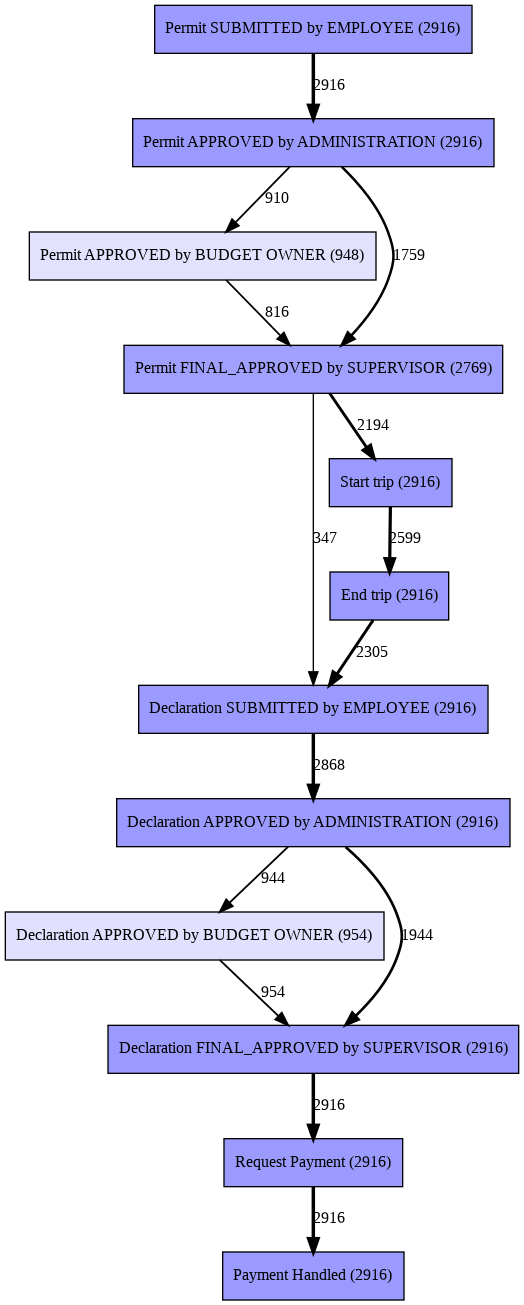

In [ ]:
dfg = dfg_discovery.apply(filtered_log)
parameters={dfg_visualization.Variants.FREQUENCY.value.Parameters.MAX_NO_EDGES_IN_DIAGRAM:14}
gviz = dfg_visualization.apply(dfg, log=filtered_log, variant=dfg_visualization.Variants.FREQUENCY, parameters = parameters)
dfg_visualization.view(gviz)


In [ ]:
## Alpha miner

replaying log with TBR, completed variants ::   0%|          | 0/33 [00:00<?, ?it/s]

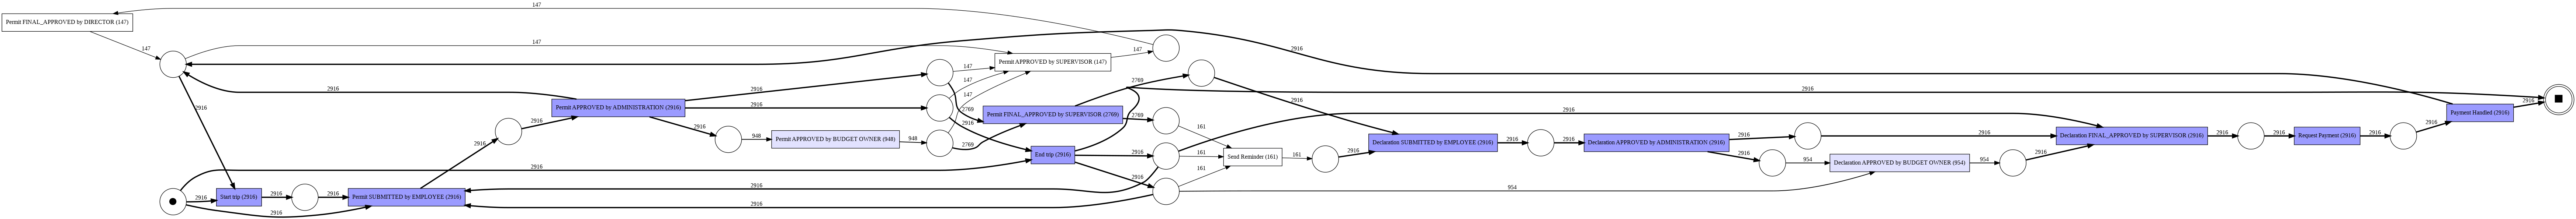

In [ ]:
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(filtered_log)
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=filtered_log)
pn_visualizer.view(gviz)

In [ ]:
##Evaluation

In [ ]:
alphaFitnessToken = replay_fitness_evaluator.apply(filtered_log, net,  initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness: ', alphaFitnessToken)

alphaPrec = precision_evaluator.apply(filtered_log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision: ', alphaPrec)

alphaGen = generalization_evaluator.apply(filtered_log, net, initial_marking, final_marking)
print('Generalization: ', alphaGen)

alphaSimpl = simplicity_evaluator.apply(net)
print('Simplicity: ', alphaSimpl)

replaying log with TBR, completed variants ::   0%|          | 0/33 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.6700095683854859, 'log_fitness': 0.6739232633042048, 'percentage_of_fitting_traces': 0.0}


replaying log with TBR, completed variants ::   0%|          | 0/217 [00:00<?, ?it/s]

Precision:  1.0


replaying log with TBR, completed variants ::   0%|          | 0/33 [00:00<?, ?it/s]

Generalization:  0.9670471114544225
Simplicity:  0.5142857142857142


In [ ]:
## Heuristic miner 

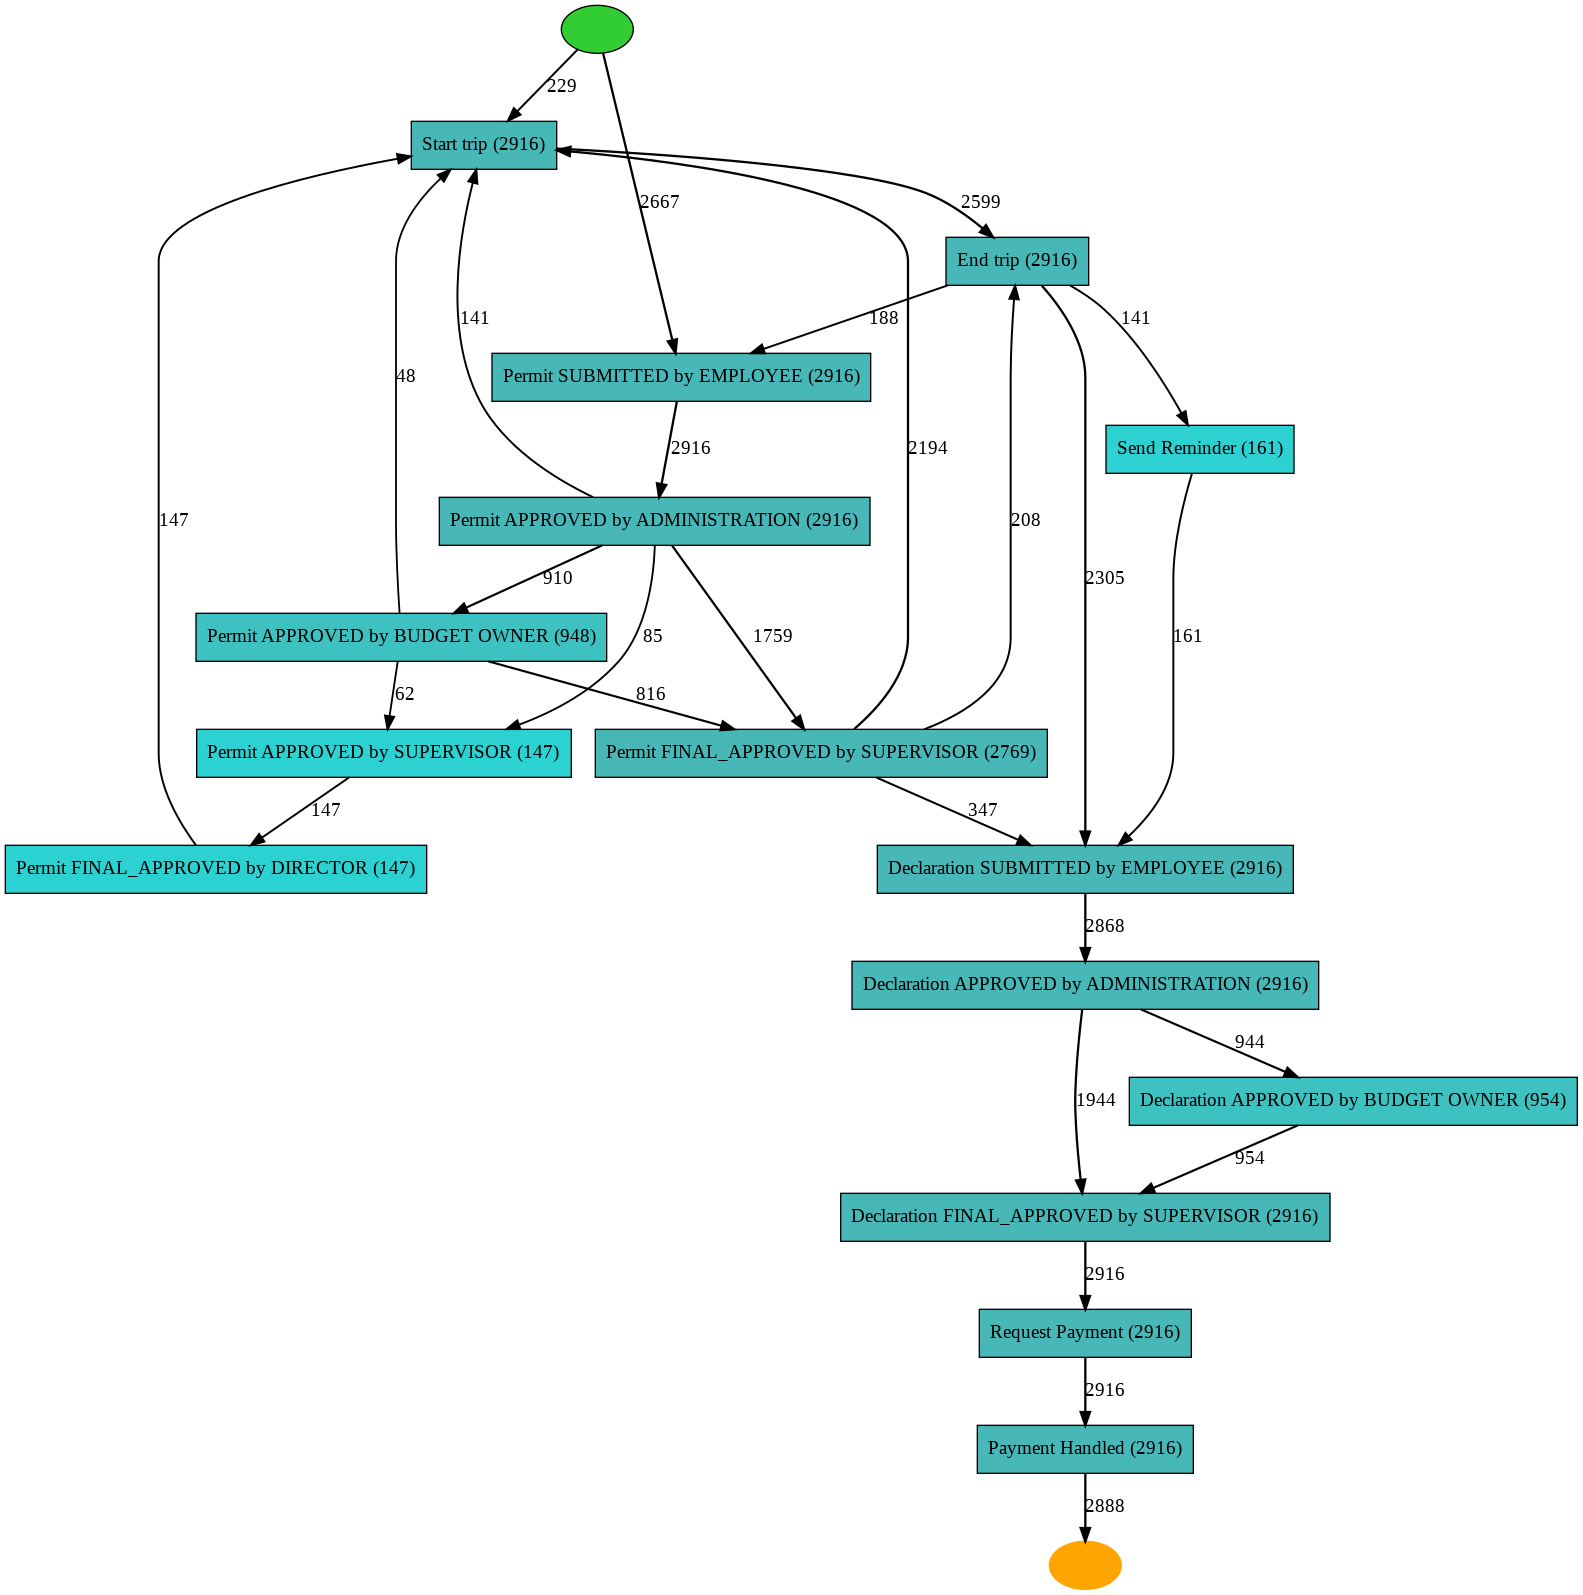

In [ ]:
parameters = {heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.6, heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT: 30, heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES: 30} 
heu_net = heuristics_miner.apply_heu(filtered_log, parameters=parameters)
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)


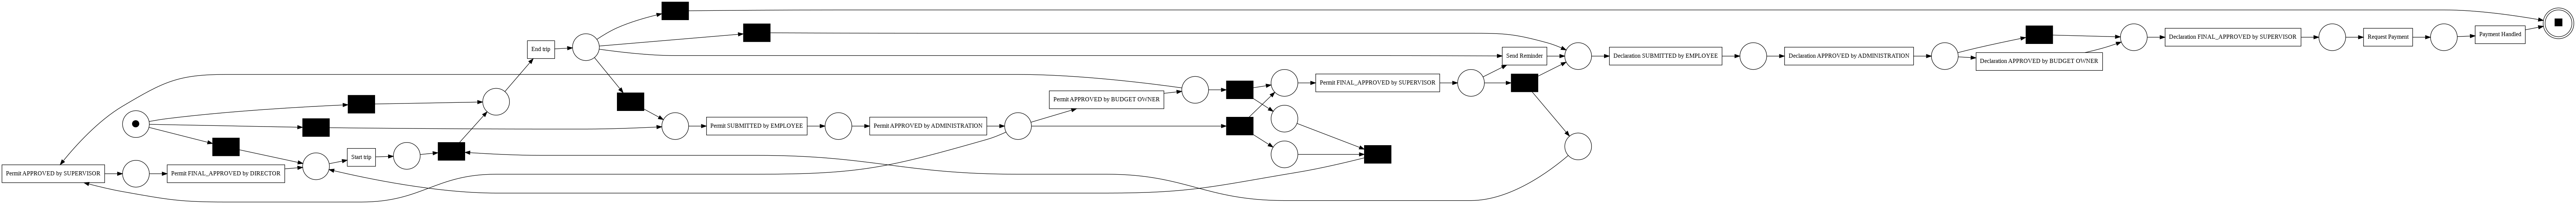

In [ ]:
#Petri Net using Heuristic Miner
parameters = {heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.9, heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT: 10, heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES: 10} 
net, initial_marking, final_marking = heuristics_miner.apply(filtered_log, parameters=parameters)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/33 [00:00<?, ?it/s]

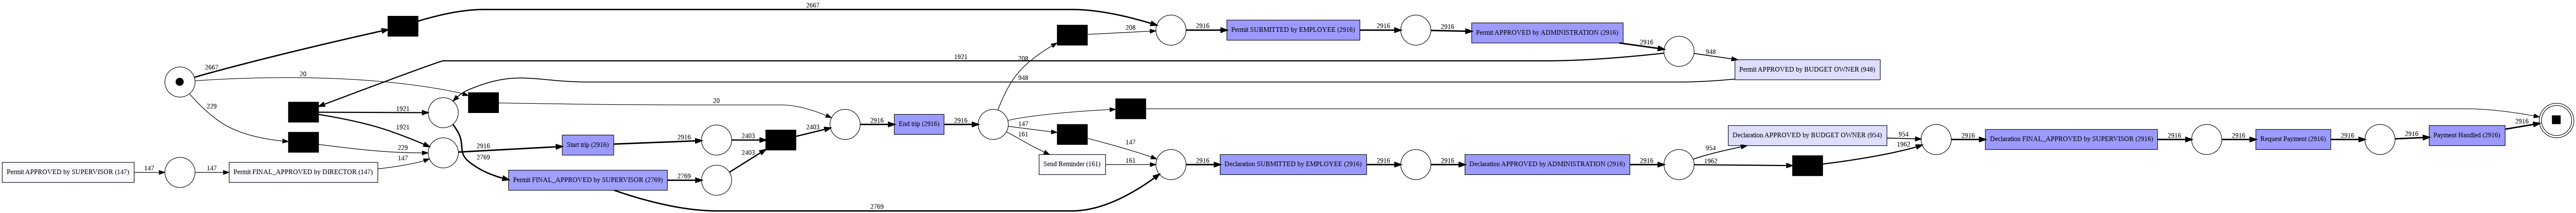

In [ ]:
net, initial_marking, final_marking = heuristics_miner.apply(filtered_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=filtered_log)
pn_visualizer.view(gviz)

In [ ]:
heuristicsFitness = replay_fitness_evaluator.apply(filtered_log, net,  initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness: ', heuristicsFitness)

heuristicsPrec = precision_evaluator.apply(filtered_log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision: ', heuristicsPrec)

heuristicsGen = generalization_evaluator.apply(filtered_log, net, initial_marking, final_marking)
print('Generalization: ', heuristicsGen)

heuristicsSimpl = simplicity_evaluator.apply(net)
print('Simplicity: ', heuristicsSimpl)

replaying log with TBR, completed variants ::   0%|          | 0/33 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.9077387746124436, 'log_fitness': 0.9079541677544338, 'percentage_of_fitting_traces': 0.0}


replaying log with TBR, completed variants ::   0%|          | 0/217 [00:00<?, ?it/s]

Precision:  0.9966244725738397


replaying log with TBR, completed variants ::   0%|          | 0/33 [00:00<?, ?it/s]

Generalization:  0.8868241423506907
Simplicity:  0.6712328767123287


In [ ]:
## Inductive miner

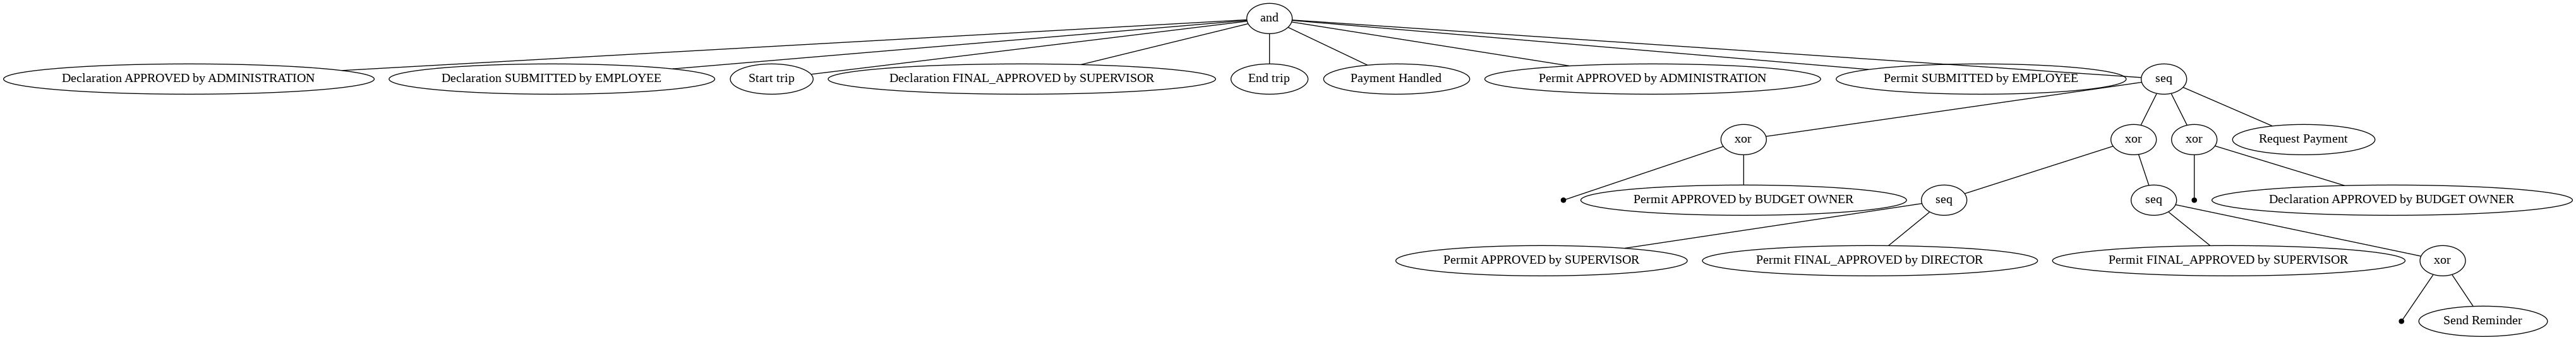

In [ ]:
tree = inductive_miner.apply_tree(filtered_log)
gviz = pt_visualizer.apply(tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/33 [00:00<?, ?it/s]

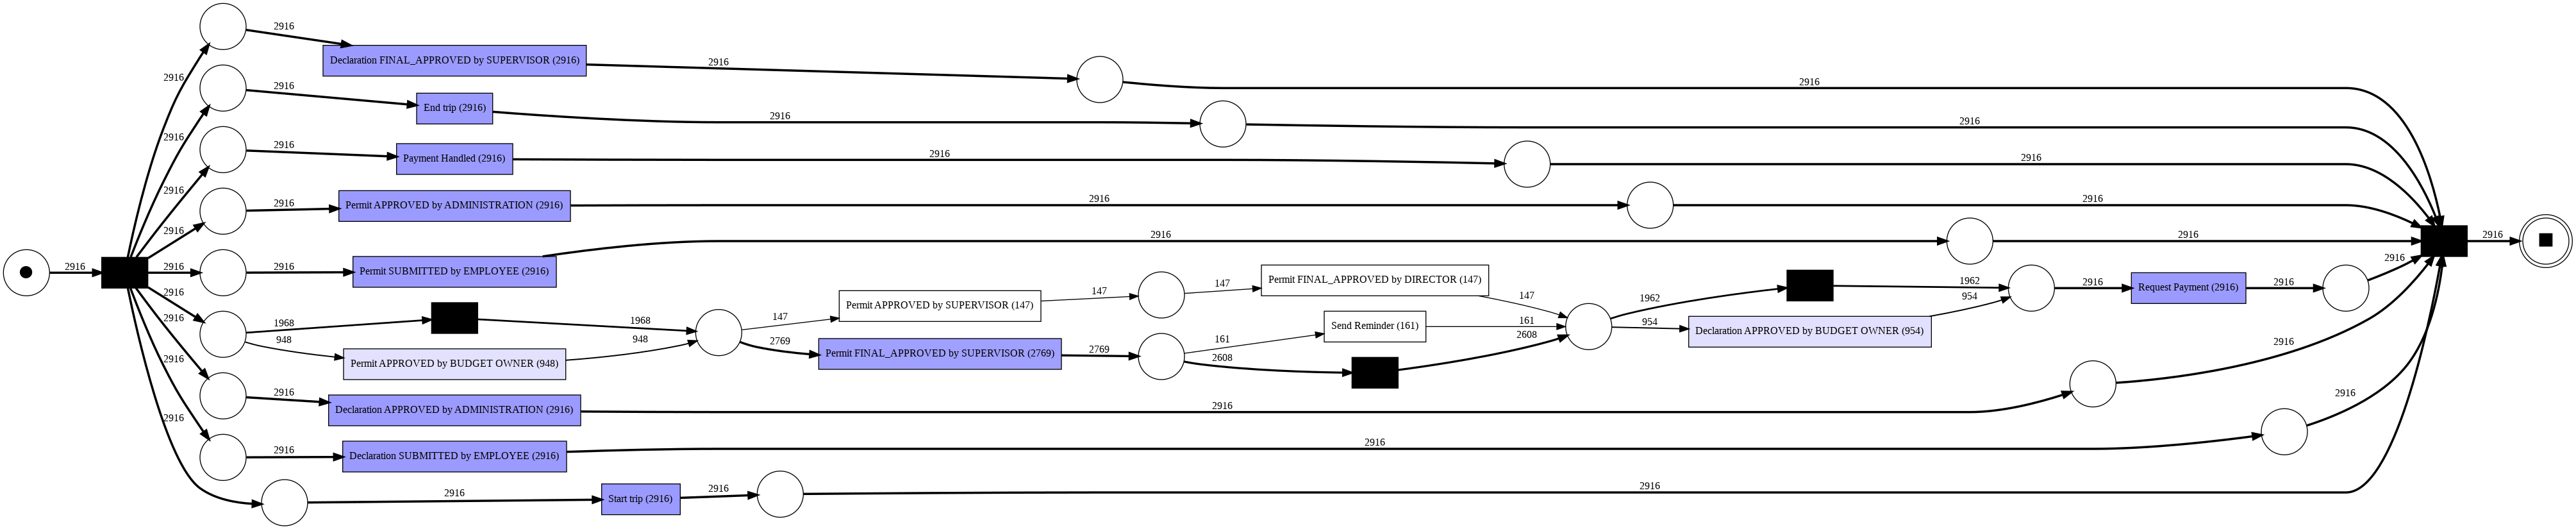

In [ ]:
net, initial_marking, final_marking  = pt_converter.apply(tree)
gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=filtered_log)
pn_visualizer.view(gviz)

In [ ]:
##Evaluation

In [ ]:
inductiveFitness = replay_fitness_evaluator.apply(filtered_log, net,  initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness: ', inductiveFitness)

inductivePrec = precision_evaluator.apply(filtered_log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision: ', inductivePrec)

inductiveGen = generalization_evaluator.apply(filtered_log, net, initial_marking, final_marking)
print('Generalization: ', inductiveGen)

inductiveSimpl = simplicity_evaluator.apply(net)
print('Simplicity: ', inductiveSimpl)


replaying log with TBR, completed variants ::   0%|          | 0/33 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}


replaying log with TBR, completed variants ::   0%|          | 0/217 [00:00<?, ?it/s]

Precision:  0.2946513106761818


replaying log with TBR, completed variants ::   0%|          | 0/33 [00:00<?, ?it/s]

Generalization:  0.9701985100306814
Simplicity:  0.6716417910447761
